# Proyecto de Ciencia de Datos - Análisis de Ventas y Envíos

## Descripción del Proyecto

Este proyecto tiene como objetivo realizar un análisis de datos relacionados con ventas, tipos de envío y segmentación de clientes utilizando técnicas de visualización y manipulación de datos. El conjunto de datos utilizado proviene de **Kaggle**, el dataset se enfoca en el análisis de ventas de una empresa a través de distintas regiones, categorías de productos y segmentos de clientes.

El proyecto busca generar insights que puedan ayudar a comprender mejor los factores que impactan en los beneficios por región, categoría y tipo de cliente, así como la influencia que tiene el modo de envío en la rentabilidad de la empresa.

## Descripción del Dataset

El dataset contiene información detallada sobre las transacciones comerciales de la empresa, entre las que se incluyen:

- **Ship Mode**: El tipo de envío utilizado para entregar el producto.
- **Category**: La categoría a la que pertenece el producto (como Tecnología, Muebles, etc.).
- **Segment**: El segmento de cliente al que se ha dirigido (como Consumo, Corporativo, Home Office).
- **Region**: La región geográfica donde se realizó la venta.
- **Profit**: El beneficio obtenido por cada transacción.
- Otros campos adicionales como el valor de la venta, la cantidad de productos vendidos, etc.

## Hipótesis y Preguntas de Interés

1. **¿Cuáles son las categorías de productos más rentables?**
   - Hipótesis: Algunas categorías generan más beneficios que otras.

2. **¿Cómo varían las ventas y el beneficio por región?**
   - Hipótesis: Existen regiones donde las ventas y beneficios son significativamente más altos.

3. **¿Cómo influye el descuento en las ventas y el beneficio?**
   - Hipótesis: Un mayor descuento puede reducir las ventas totales y el beneficio.

4. **¿Hay algún patrón temporal en las ventas o beneficios (por ejemplo, estacionalidad)?**
   - Hipótesis: Las ventas pueden ser más altas en ciertos meses o trimestres.

5. **¿Qué tipo de envío resulta en mayores beneficios?**
   - Hipótesis: Los tipos de envío más rápidos o costosos generan más beneficios.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:

# Ruta al archivo CSV
csv_path = 'data/superstore.csv'

# Leer el archivo CSV
df = pd.read_csv(csv_path, encoding='latin1')

# Mostrar el DataFrame
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [12]:
# Contar el total de nulos en todo el DataFrame
total_nulos = df.isnull().sum().sum()

print("\nTotal de nulos en el DataFrame:", total_nulos)


Total de nulos en el DataFrame: 0


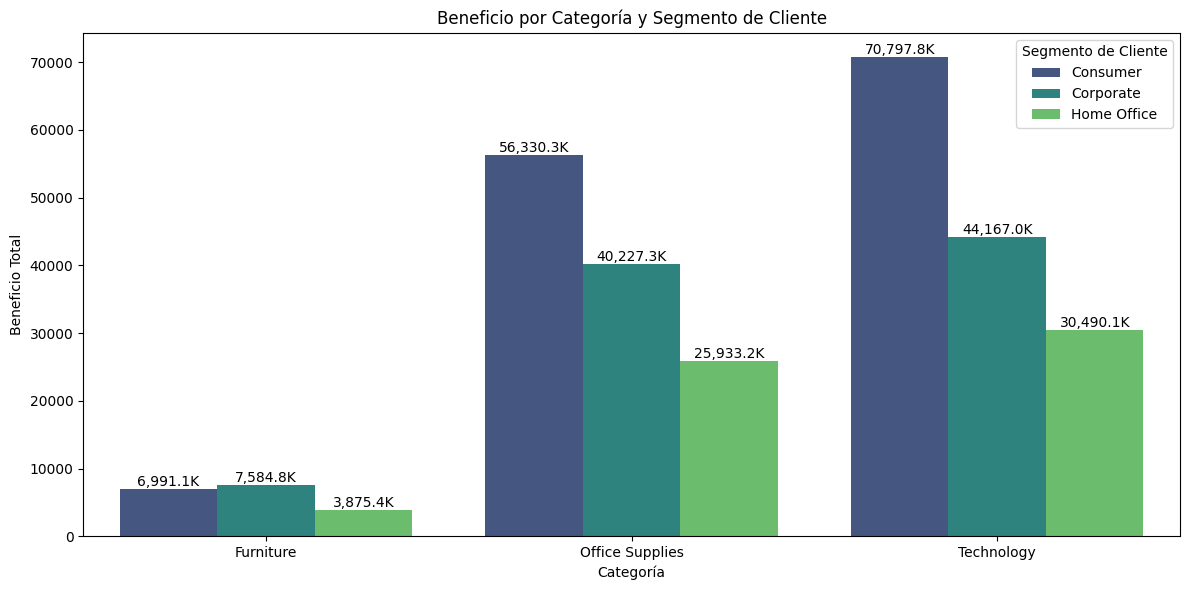

In [4]:
# Agrupar por categoría y segmento de cliente, sumando los beneficios
profit_by_category_segment = df.groupby(['Category', 'Segment'])['Profit'].sum().reset_index()

# Crear gráfico de barras apiladas
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=profit_by_category_segment, x='Category', y='Profit', hue='Segment', palette='viridis')

# Añadir etiquetas de beneficios sobre cada barra, solo si el valor es mayor que 0
for p in bar_plot.patches:
    if p.get_height() > 0:  
        bar_plot.annotate(f'{p.get_height():,.1f}K', 
                          (p.get_x() + p.get_width() / 2., p.get_height() + 1000), 
                          ha='center', va='center', fontsize=10, color='black')

# Ajustes del gráfico
plt.title('Beneficio por Categoría y Segmento de Cliente')
plt.ylabel('Beneficio Total')
plt.xlabel('Categoría')
plt.legend(title='Segmento de Cliente')
plt.xticks(rotation=0)  
plt.tight_layout()

# Mostrar el gráfico
plt.show()


1. **¿Cuáles son las categorías de productos más rentables?**
   - Hipótesis: Algunas categorías generan más beneficios que otras.

   **R:** A partir del análisis de los datos, se puede observar que la categoría de **tecnología** es la que genera los mayores beneficios en comparación con otras categorías, como **muebles** y **material de oficina**. Esta tendencia puede explicarse por varios factores clave:

   - **Margen de beneficio más alto**: Los productos tecnológicos, como ordenadores, teléfonos y dispositivos electrónicos, suelen tener márgenes de beneficio más elevados en comparación con otras categorías.
  
   - **Mayor demanda**: La tecnología es una necesidad creciente tanto para consumidores individuales como para empresas, lo que incrementa el volumen de ventas en esta categoría.

   - **Innovación constante**: La rápida innovación tecnológica genera una alta rotación de productos, lo que favorece las ventas recurrentes y, en consecuencia, mayores ingresos.

   - **Valor promedio por unidad**: Los productos de tecnología tienen un valor promedio por unidad más alto en comparación con productos de otras categorías, como muebles o material de oficina, lo que también contribuye a un mayor beneficio total.

   **Conclusión**:
   La categoría de **tecnología** es la más rentable. Esto sugiere que la empresa podría centrarse aún más en optimizar sus operaciones en esta área para maximizar los beneficios. Además, se podrían explorar estrategias para mejorar la rentabilidad de las otras categorías, como optimizar los costos o aumentar el volumen de ventas.

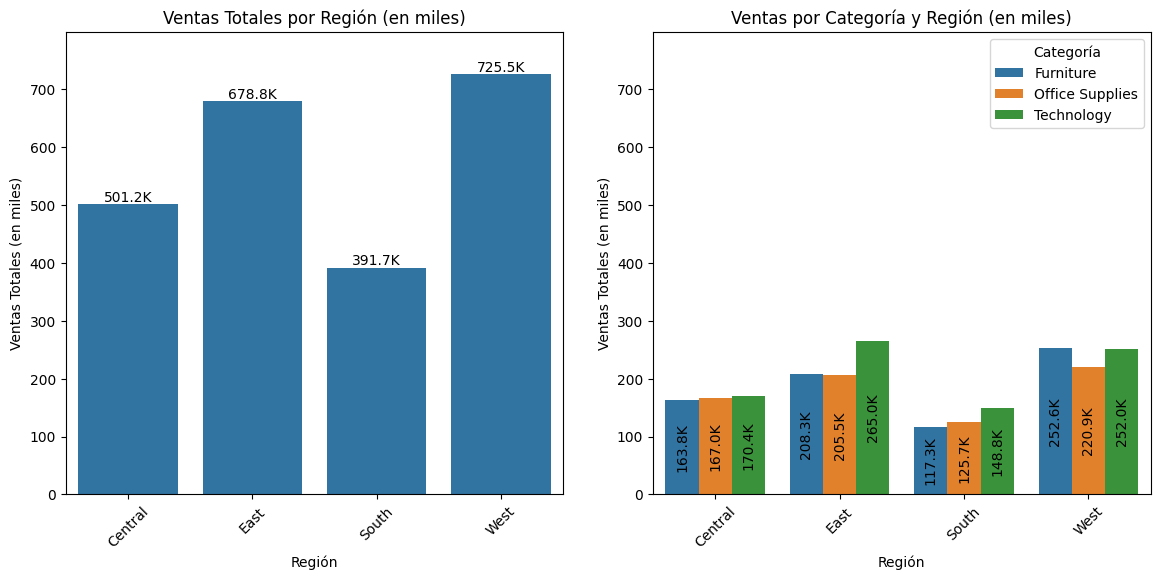

In [5]:
# Crear una figura con dos subgráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Gráfico 1: Ventas Totales por Región
total_sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
total_sales_by_region['Sales'] /= 1000  # Convertir a miles
bar_plot = sns.barplot(data=total_sales_by_region, x='Region', y='Sales', ax=axes[0])

# Agregar etiquetas de ventas totales sobre cada barra
for p in bar_plot.patches:
    if p.get_height() > 0.1:  
        bar_plot.annotate(f'{p.get_height():,.1f}K', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', fontsize=10)

axes[0].set_title('Ventas Totales por Región (en miles)')
axes[0].set_ylabel('Ventas Totales (en miles)')
axes[0].set_xlabel('Región')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Ventas por Categoría y Región (con totales)
plt_data = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()
plt_data['Sales'] /= 1000  # Convertir a miles
sns.barplot(data=plt_data, x='Region', y='Sales', hue='Category', ax=axes[1], errorbar=None)

# Agregar etiquetas de ventas totales dentro de cada barra en el Gráfico 2
for p in axes[1].patches:
    if p.get_height() > 0.1: 
        axes[1].annotate(f'{p.get_height():,.1f}K', 
                         (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # Centrar verticalmente
                         ha='center', va='center', fontsize=10, rotation=90)  # Rotar a vertical

axes[1].set_title('Ventas por Categoría y Región (en miles)')
axes[1].set_ylabel('Ventas Totales (en miles)')
axes[1].set_xlabel('Región')
axes[1].legend(title='Categoría')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar el límite del eje y para que ambos gráficos tengan la misma escala
max_sales = max(total_sales_by_region['Sales'].max(), plt_data['Sales'].max())
axes[0].set_ylim(0, max_sales * 1.1)
axes[1].set_ylim(0, max_sales * 1.1)

# Ajustar el espacio entre las subgráficas
plt.subplots_adjust(wspace=0.18)

# Mostrar los gráficos
plt.show()





2. **¿Cómo varían las ventas y el beneficio por región?**
   - Hipótesis: Existen regiones donde las ventas y beneficios son significativamente más altos.

   **R:** Al analizar los datos, se puede observar que las ventas y los beneficios varían de manera moderada entre las diferentes regiones, con una diferencia aproximada de **100,000** unidades monetarias entre ellas. Sin embargo, la mayor variación se encuentra entre las regiones **West** y **South**, lo que sugiere que estas dos áreas son las más diferenciadas en términos de rentabilidad.

   - **Región West**: Presenta los beneficios más altos en comparación con otras regiones, lo que podría ser el resultado de una mayor demanda o una mejor infraestructura de distribución y ventas.
  
   - **Región South**: Es la que muestra los beneficios más bajos, lo que podría estar vinculado a factores como menor población, menos infraestructura comercial o una competencia más fuerte.

   **Observaciones adicionales:**

   - Las diferencias entre otras regiones, como **East** y **Central**, son menos marcadas y varían en torno a los **100,000**. Esto indica que, aunque hay algunas diferencias en las ganancias por región, no son lo suficientemente grandes como para concluir que una región específica tiene una ventaja significativa sobre las demás.

   - Es importante analizar si la variación entre West y South se debe a estrategias comerciales específicas o si es una cuestión de características inherentes a las regiones (tamaño de mercado, acceso a productos, etc.).

   **Conclusión:**
   Aunque existen diferencias en las ventas y beneficios entre las regiones, la variación más significativa ocurre entre las regiones **West** y **South**, con la primera generando más beneficios. Las demás regiones presentan una variación moderada, alrededor de **100,000** unidades monetarias. Este análisis podría ayudar a identificar áreas donde las estrategias de ventas o marketing pueden necesitar ajustes para optimizar la rentabilidad en cada región.

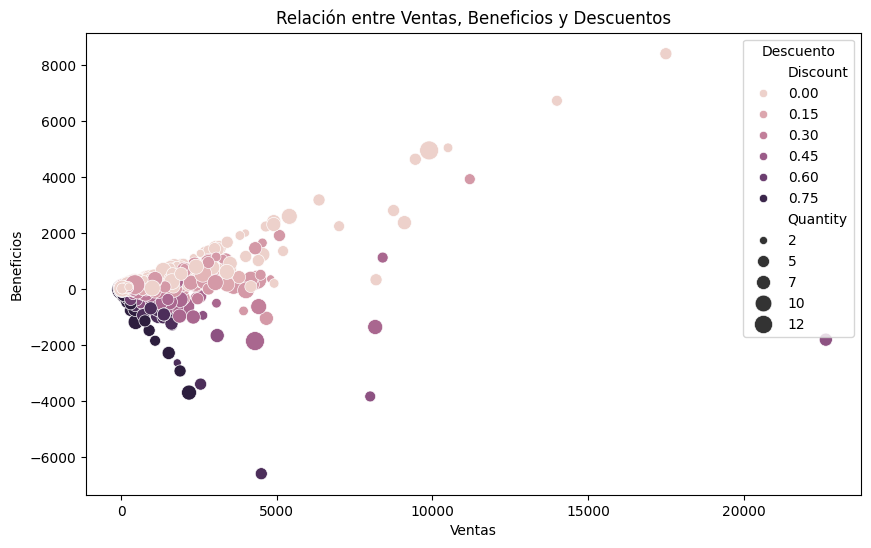

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Discount', size='Quantity', sizes=(20, 200))
plt.title('Relación entre Ventas, Beneficios y Descuentos')
plt.xlabel('Ventas')
plt.ylabel('Beneficios')
plt.legend(title='Descuento')
plt.show()



3. **¿Cómo influye el descuento en las ventas y el beneficio?**
   - Hipótesis: Un mayor descuento puede reducir las ventas totales y el beneficio.

   **R:** En general, es común que un descuento más alto pueda llevar a una reducción en el beneficio neto, y esto parece ser cierto en el caso analizado. Los datos muestran que:

   - **Descuentos elevados (45% o más)**: A partir de un **45% de descuento**, los productos no solo no generan un incremento en las ventas, sino que incluso **generan pérdidas**. Esto indica que los márgenes de beneficio se reducen tanto que ni siquiera un mayor volumen de ventas puede compensar la reducción en los ingresos.

   - **Descuentos bajos o moderados**: En el caso de descuentos más bajos, se observa lo contrario: las **ventas aumentan** y, en consecuencia, los **beneficios también aumentan**. Esto sugiere que los clientes responden positivamente a pequeños incentivos de precio sin que esto afecte de manera significativa los márgenes de beneficio.

   **Análisis adicional:**

   - **Estrategia de precios**: Los resultados sugieren que ofrecer descuentos muy altos puede ser contraproducente, ya que no solo disminuyen el margen de ganancia, sino que también pueden llevar a pérdidas. En cambio, los descuentos menores parecen ser más efectivos para generar tanto un aumento en las ventas como en el beneficio.
  
   - **Posible explicación**: Esto podría deberse a que los descuentos elevados pueden devaluar la percepción del producto o atraer a compradores menos comprometidos con la marca, mientras que descuentos pequeños mantienen el valor percibido y generan una mayor conversión de ventas.

   **Conclusión:**
   En este análisis, se confirma que **los descuentos más elevados (45% o más) generan pérdidas**, mientras que los **descuentos menores** resultan en **mayores ventas y beneficios**. Este comportamiento sugiere que la empresa debería enfocarse en descuentos moderados como estrategia para maximizar tanto las ventas como los beneficios, evitando descuentos demasiado agresivos que perjudiquen la rentabilidad.

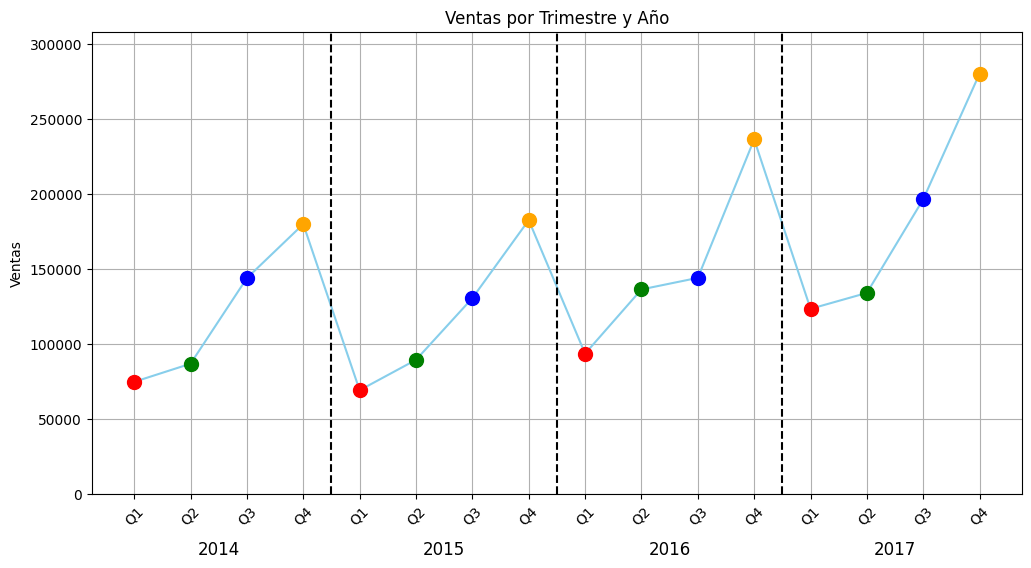

In [9]:
# Convertir la columna 'Order Date' a datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Agrupar por trimestre y año, sumando las ventas
sales_over_quarter = df.groupby(df['Order Date'].dt.to_period('Q')).agg({'Sales': 'sum'}).reset_index()

# Crear una nueva columna para mostrar el trimestre
sales_over_quarter['Quarter'] = 'Q' + sales_over_quarter['Order Date'].dt.quarter.astype(str)

# Crear una nueva columna para el año
sales_over_quarter['Year'] = sales_over_quarter['Order Date'].dt.year.astype(str)

# Crear la gráfica
plt.figure(figsize=(12, 6))

# Gráfico de líneas
plt.plot(sales_over_quarter['Quarter'] + " " + sales_over_quarter['Year'], sales_over_quarter['Sales'], color='skyblue')

# Pintar los puntos de diferentes colores
colors = {'Q1': 'red', 'Q2': 'green', 'Q3': 'blue', 'Q4': 'orange'}

for index, row in sales_over_quarter.iterrows():
    plt.scatter(row['Quarter'] + " " + row['Year'], row['Sales'], color=colors[row['Quarter']], marker='o', s=100, zorder=5)  # Asegura que los puntos estén sobre la línea

# Ajustar las etiquetas del eje x
plt.xticks(rotation=45)

# Agregar título y etiquetas
plt.title('Ventas por Trimestre y Año')
plt.ylabel('Ventas')

# Ajustar los ticks del eje x para mostrar solo los trimestres sin repetir años
xticks = sales_over_quarter['Quarter'].tolist()
plt.xticks(ticks=range(len(xticks)), labels=xticks)

# Centrar los años debajo de los Q
years = sales_over_quarter['Year'].unique()
for i, year in enumerate(years):
    plt.text(i * 4 + 1.5, -37000, year, ha='center', va='center', fontsize=12)

# Añadir líneas verticales segmentadas para separar los años
for i in range(len(years) - 1):
    plt.axvline(x=(i + 1) * 4 - 0.5, color='black', linestyle='--')

# Ajustar límites del eje Y si es necesario
plt.ylim(0, sales_over_quarter['Sales'].max() * 1.1)

plt.grid()
plt.show()


4. **¿Hay algún patrón temporal en las ventas o beneficios (por ejemplo, estacionalidad)?**
   - Hipótesis: Las ventas pueden ser más altas en ciertos meses o trimestres

   **R:** Del análisis de los datos se observa claramente un patrón de **estacionalidad** en las ventas y beneficios a lo largo de los años. Los datos muestran que:

   - **Ventas más altas en el último trimestre**: Todos los años, el **último trimestre** muestra un incremento significativo en las ventas y beneficios. Este patrón se repite consistentemente, lo que indica un comportamiento predecible en este período.

   - **Comportamiento similar trimestre a trimestre**: No solo el último trimestre es más fuerte en términos de ventas, sino que también los otros trimestres del año presentan un comportamiento bastante similar de un año a otro, mostrando comportamiento similar interanual en las ventas y beneficios en estos períodos.

   **Análisis adicional:**

   - **Posibles razones**: El aumento de las ventas en el último trimestre puede estar vinculado a eventos importantes como el **Black Friday**, **Cyber Monday**, y las compras de la temporada navideña, que impulsan la demanda y aumentan los ingresos de manera considerable.

   - **Estrategias comerciales**: Dado este patrón de estacionalidad, la empresa podría enfocar sus esfuerzos en maximizar las ventas durante el último trimestre, optimizando su inventario, campañas de marketing y promociones en función de esta demanda estacional.

   **Conclusión:**
   Existe una **clara estacionalidad** en las ventas y beneficios, con picos evidentes en el **último trimestre** de cada año. Este patrón predecible ofrece una oportunidad para que la empresa ajuste sus estrategias y recursos para aprovechar al máximo este aumento en la demanda, garantizando que el inventario y la fuerza de ventas estén alineados con los picos estacionales.

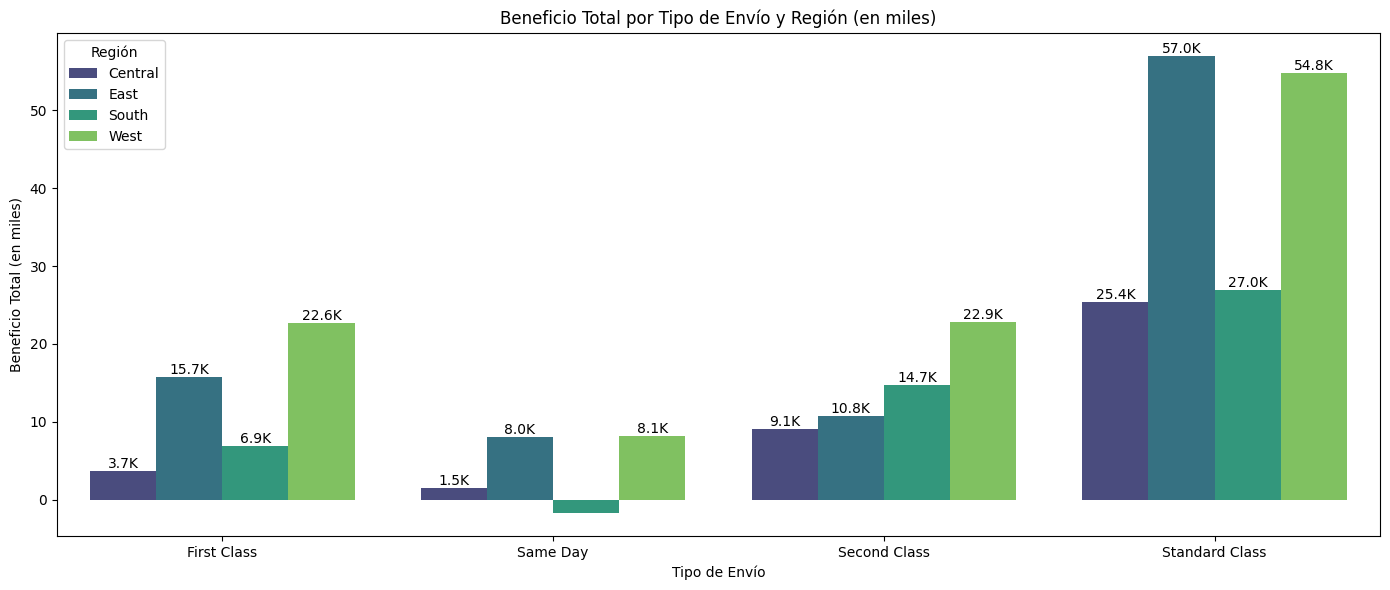

In [8]:
# Gráfico: Impacto de los tipos de envío sobre el beneficio por región
plt.figure(figsize=(14, 6))

# Agrupar por tipo de envío y región, y sumar los beneficios
profit_by_ship_mode_region = df.groupby(['Ship Mode', 'Region'])['Profit'].sum().reset_index()
profit_by_ship_mode_region['Profit'] /= 1000  # Convertir a miles

# Crear el gráfico de barras con un estilo de paleta
bar_plot = sns.barplot(data=profit_by_ship_mode_region, x='Ship Mode', y='Profit', hue='Region', palette='viridis')

# Agregar etiquetas de beneficios sobre cada barra
for p in bar_plot.patches:
    if p.get_height() > 0.1:
        bar_plot.annotate(f'{p.get_height():,.1f}K', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', fontsize=10)

plt.title('Beneficio Total por Tipo de Envío y Región (en miles)')
plt.ylabel('Beneficio Total (en miles)')
plt.xlabel('Tipo de Envío')
plt.xticks(rotation=0) 
plt.legend(title='Región')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


5. **¿Qué tipo de envío resulta en mayores beneficios?**
   - Hipótesis: Los tipos de envío más rápidos o costosos generan más beneficios.

   R: El análisis de los datos revela que la hipótesis inicialmente planteada es incorrecta. En este caso, los envíos que generan **mayores beneficios** son aquellos que son **menos costosos**, destacándose notablemente el tipo de envío **estándar**. 

   - **Envío estándar**: Esta modalidad de envío no solo es la más económica, sino que también resulta ser la más rentable, contribuyendo significativamente a los beneficios totales de la empresa. Esto sugiere que muchos clientes optan por esta opción, lo que permite mantener un margen de beneficio favorable.

   - **Otros tipos de envío**: Por otro lado, los métodos de envío más rápidos y costosos no generan los beneficios esperados. Esto podría indicar que, a pesar de su precio elevado, no hay una demanda suficiente que justifique el costo, o que los márgenes de beneficio en estos envíos son demasiado bajos.

   **Análisis adicional:**

   - **Preferencias del consumidor**: La preferencia por el envío estándar podría estar relacionada con la percepción de los consumidores sobre el valor. Muchos pueden preferir esperar un poco más para recibir sus productos si eso significa un ahorro significativo en costos.

   - **Estrategia de precios**: La empresa podría considerar ajustar sus estrategias de marketing y precios para resaltar las ventajas del envío estándar y posiblemente reconsiderar la oferta de los métodos de envío más caros.

   **Conclusión:**
   El análisis demuestra que **los envíos menos costosos, en particular el envío estándar**, son los que resultan en mayores beneficios, desafiando la hipótesis inicial. Esto sugiere que la empresa debería centrarse en promover este tipo de envío y evaluar la efectividad de los métodos más caros para mejorar la rentabilidad.